In [0]:
import numpy as np
import cv2

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import PIL
from IPython.display import display

def cv2_imshow(a):
  """A replacement for cv2.imshow() for use in Jupyter notebooks."""
  a = a.clip(0, 255).astype('uint8')
  # cv2 stores colors as BGR; convert to RGB
  if a.ndim == 3:
    if a.shape[2] == 4:
      a = cv2.cvtColor(a, cv2.COLOR_BGRA2RGBA)
    else:
      a = cv2.cvtColor(a, cv2.COLOR_BGR2RGB)
  display(PIL.Image.fromarray(a))

In [0]:
cap = cv2.VideoCapture("drive/My Drive/Colab Notebooks/Kinart/videokinec_depth4.avi")
cap.set(cv2.CAP_PROP_POS_MSEC, 39500)
ret, frame = cap.read()

np.clip(frame, 0, 2**10-1, frame)
frame >>= 2
frame = frame.astype(np.uint8)


height, width = frame.shape[:2]

x1 = int(width*0.3)
x2 = int(width*0.5)
y1 = int(height*0.15)
y2 = int(height*0.4)

centerPoint = [int((x1+x2)/2), int((y1+y2)/2)]

In [0]:
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
gray_copy = gray.copy()


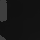

In [0]:
center_half = 20
lowerHeight = centerPoint[1] - center_half 
upperHeight = centerPoint[1] + center_half 
lowerWidth = centerPoint[0] - center_half 
upperWidth = centerPoint[0] + center_half 
center = gray[lowerHeight:upperHeight,lowerWidth:upperWidth]
cv2_imshow(center)

# import sys
# np.set_printoptions(threshold=sys.maxsize)
# print(center)

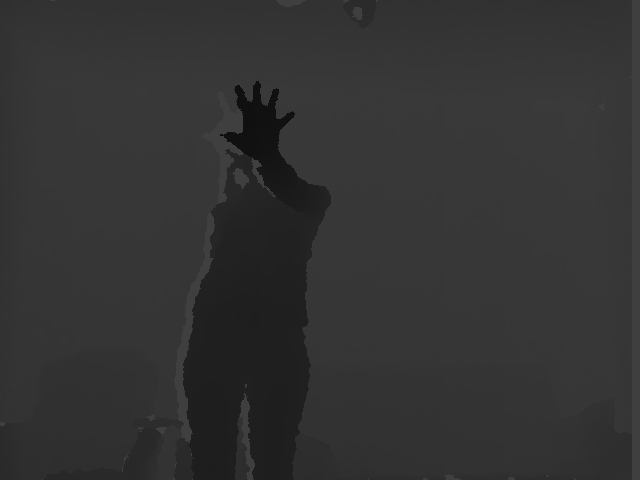

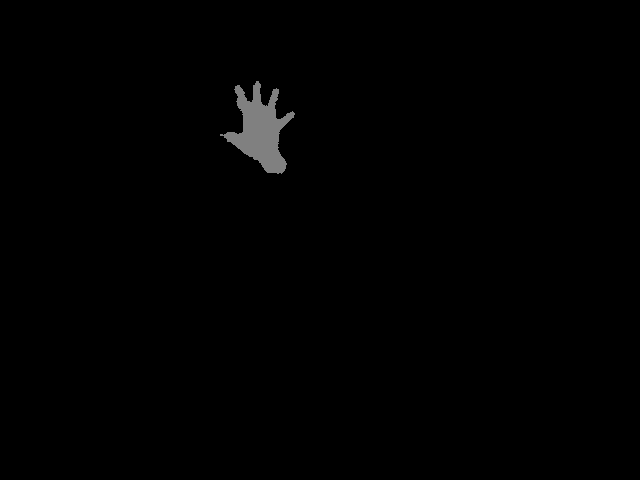

In [0]:
med_val = np.uint8(np.median(center))

med_condition = 5

cv2_imshow(gray_copy)

gray_copy = gray_copy.astype('int')
gray_copy = np.where((abs(gray_copy - int(med_val)) <= med_condition), 128, 0)
gray_copy = gray_copy.astype('uint8')

cv2_imshow(gray_copy)

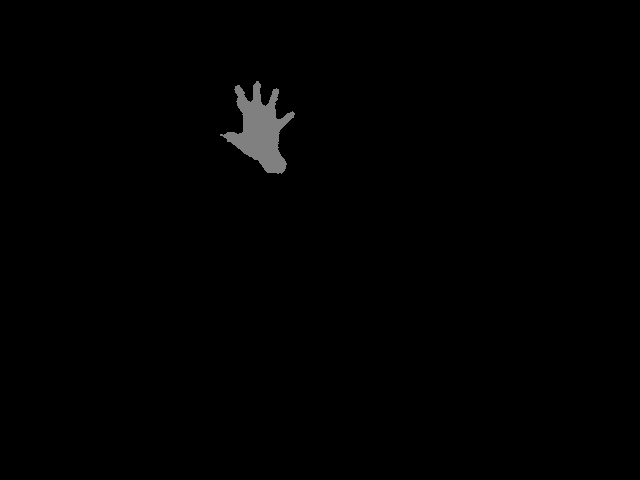

In [0]:
kernel = np.ones((5, 5), np.uint8)


kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
close = cv2.morphologyEx(gray_copy, cv2.MORPH_CLOSE, kernel, iterations=1)



cv2_imshow(close)

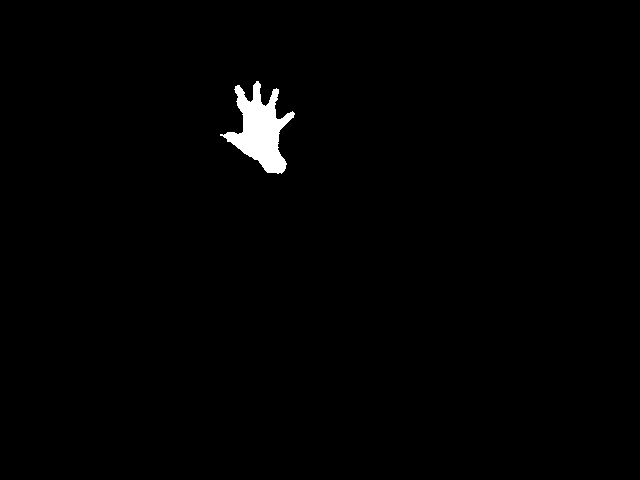

In [0]:
mask = np.zeros((height+2, width+2), np.uint8)

flood = close.copy()
cv2.floodFill(flood, mask, (centerPoint[0],centerPoint[1]), 255)

cv2_imshow(flood)

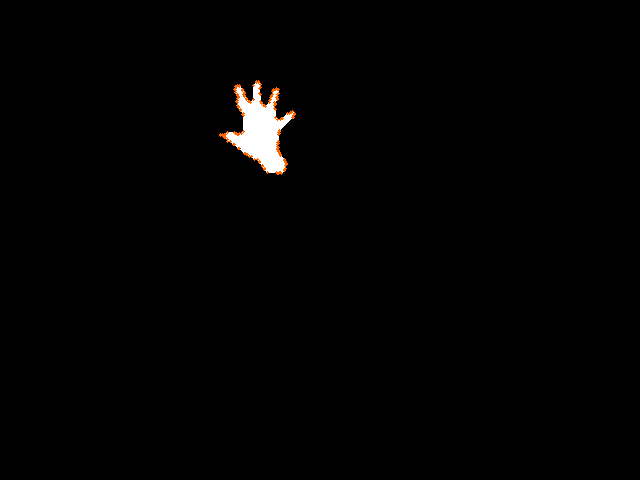

In [0]:
_, contours, hierarchy = cv2.findContours(flood, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
max_contour = max(contours, key=cv2.contourArea)

img = cv2.cvtColor(flood, cv2.COLOR_GRAY2RGB)

cv2.drawContours(img, max_contour, -1, (0,102,255), 2)
cv2_imshow(img)


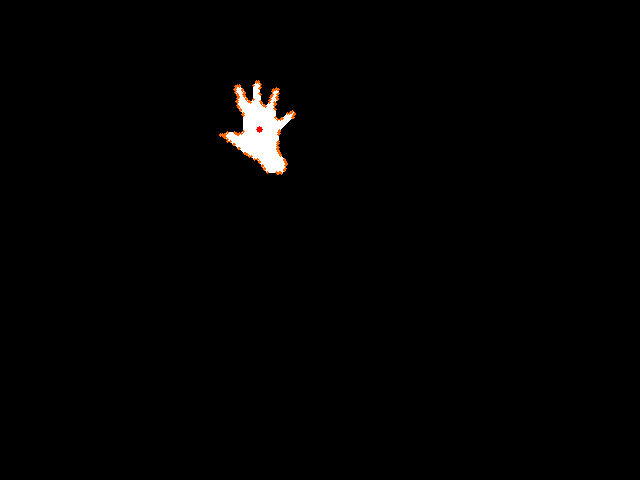

In [0]:
moment = cv2.moments(max_contour)
if moment['m00'] != 0:
  cx = int(moment['m10'] / moment['m00'])
  cy = int(moment['m01'] / moment['m00'])
  cv2.circle(img, (cx, cy), 3, (0, 0, 255), -1)

cv2_imshow(img)

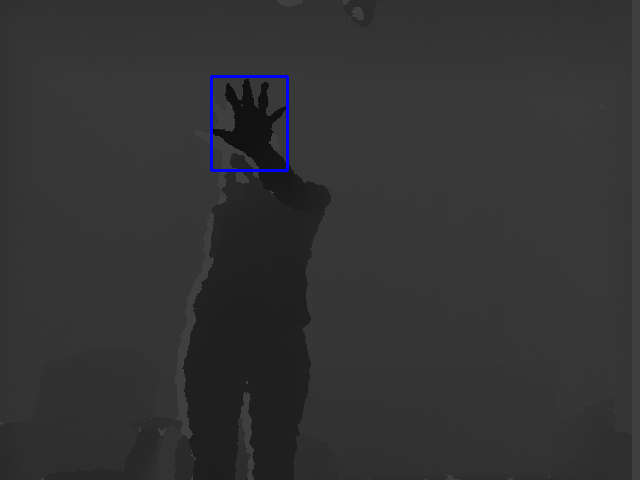

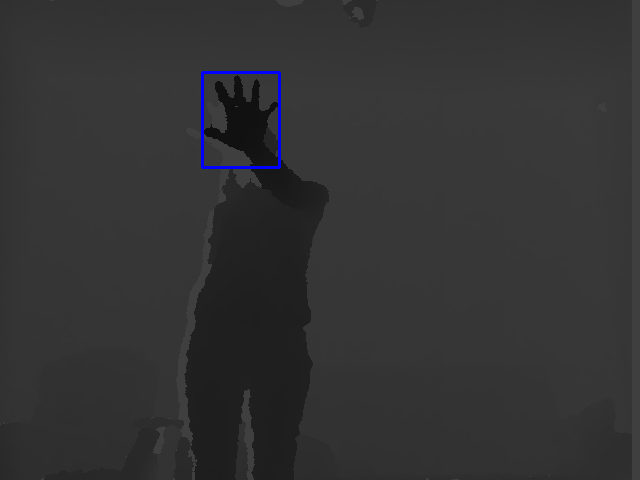

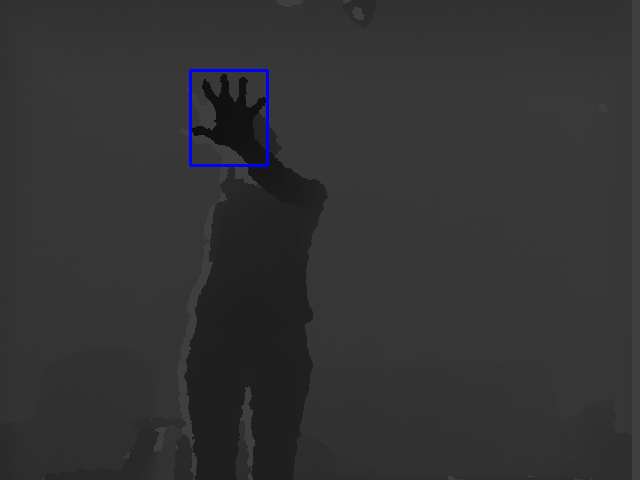

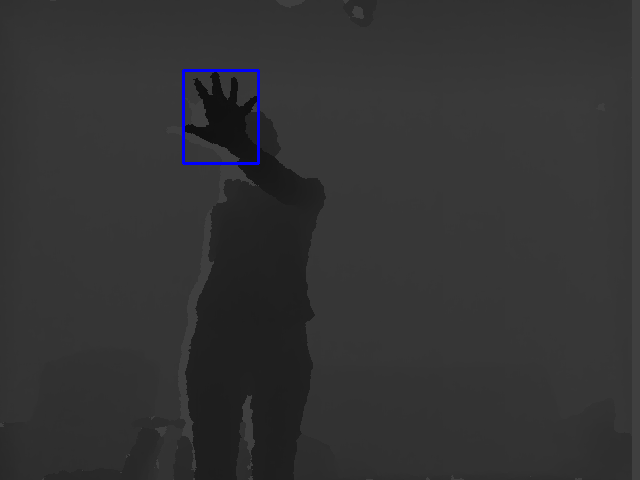

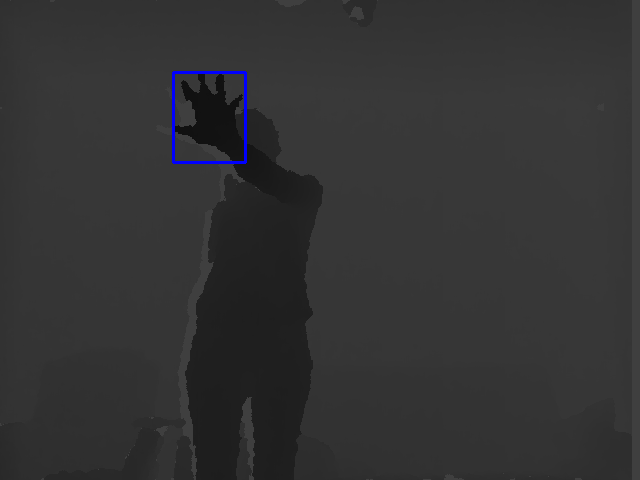

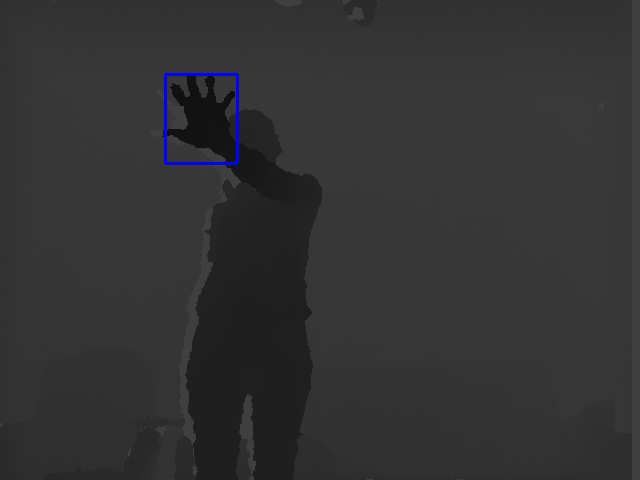

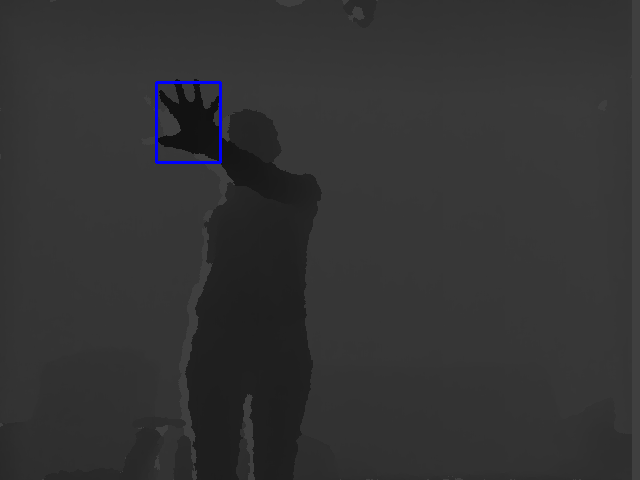

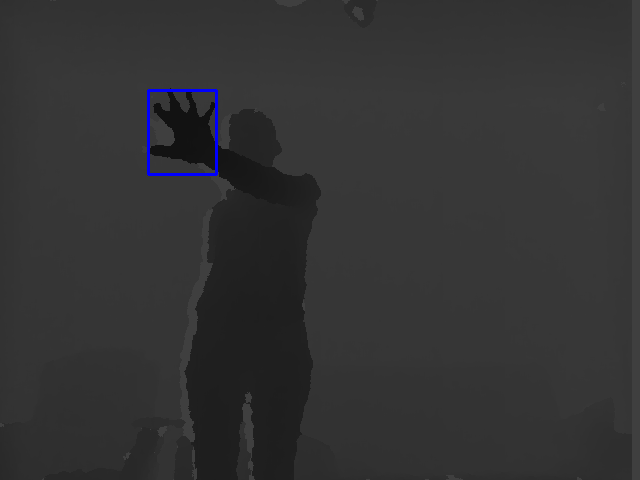

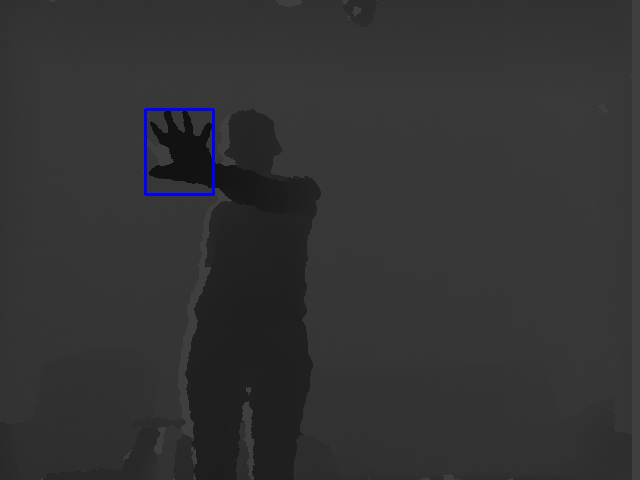

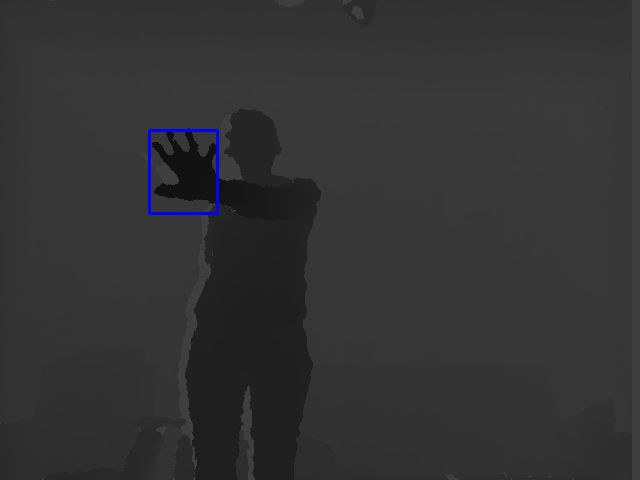

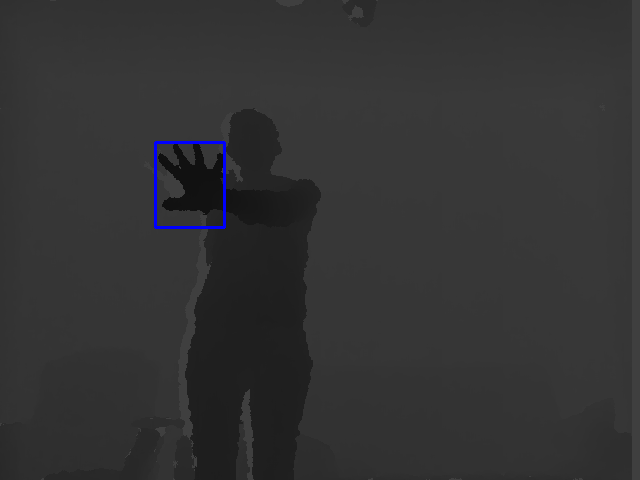

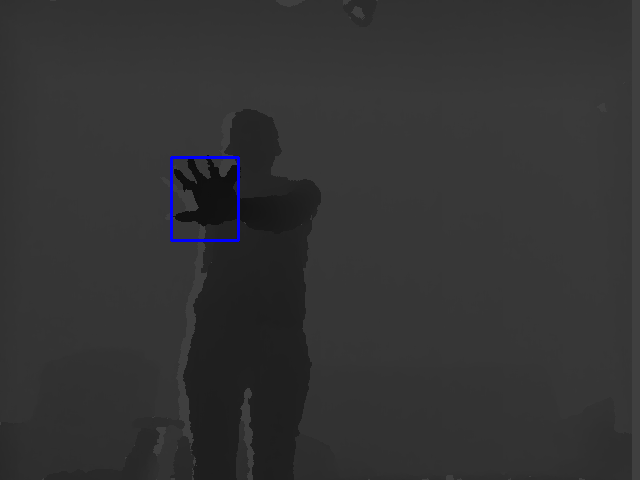

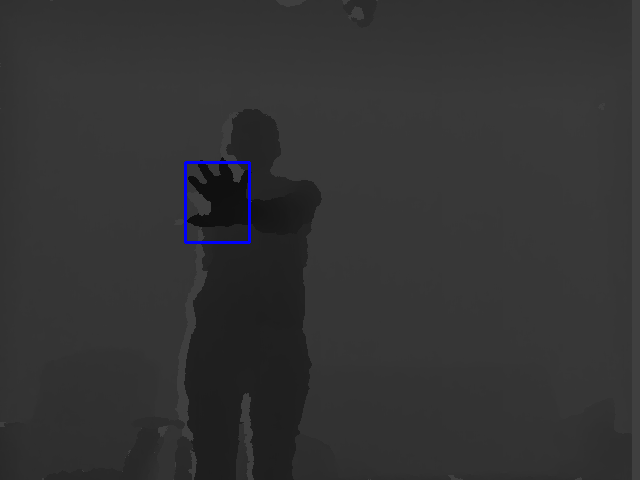

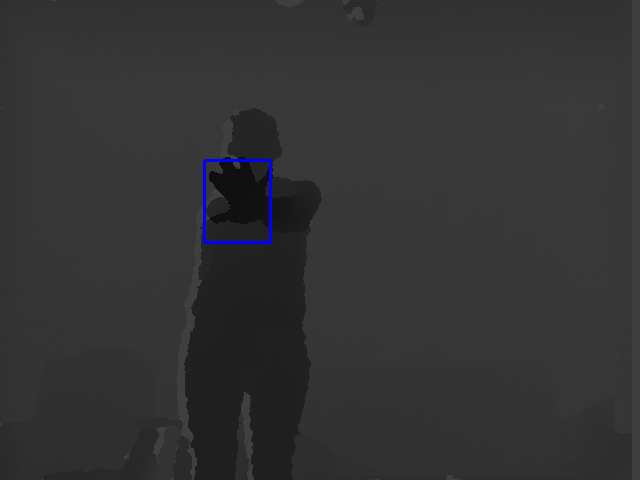

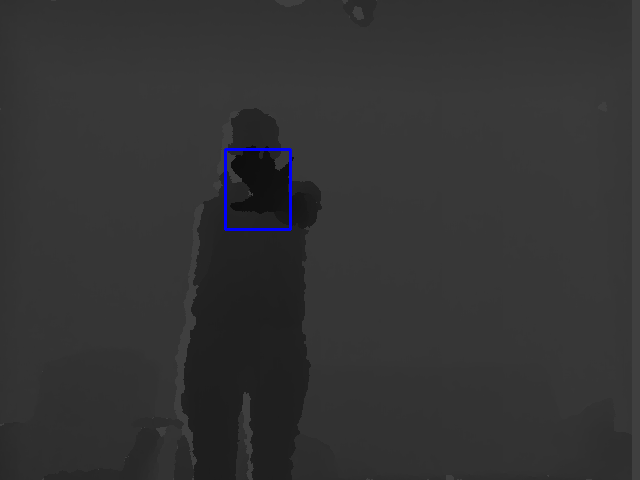

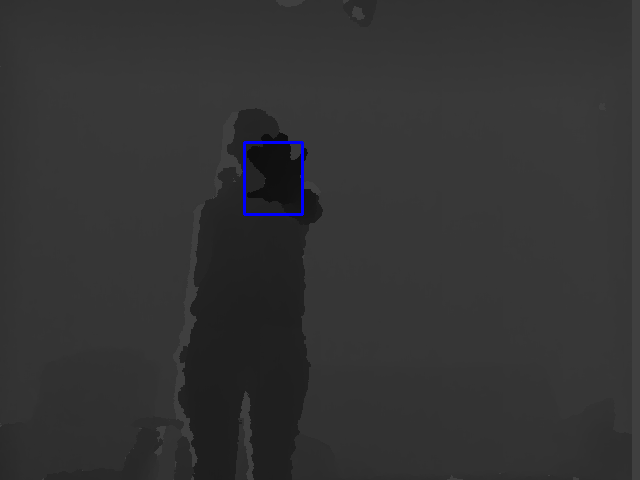

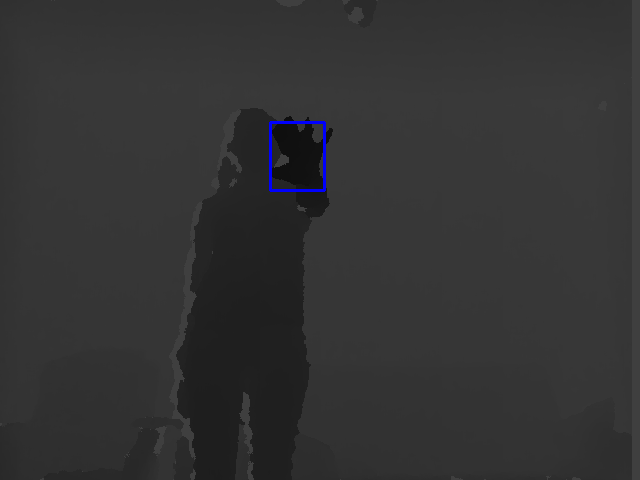

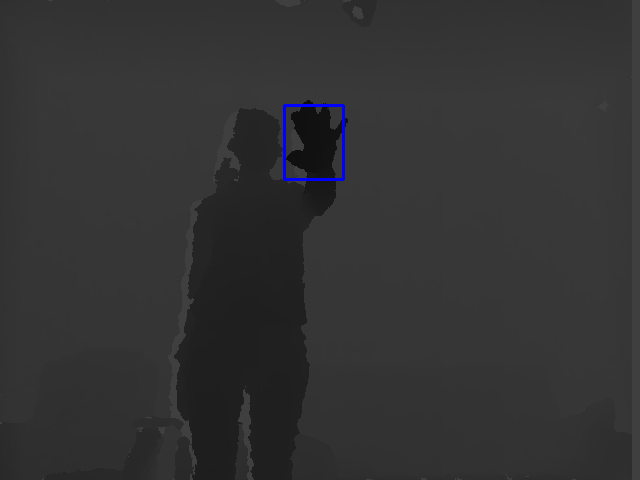

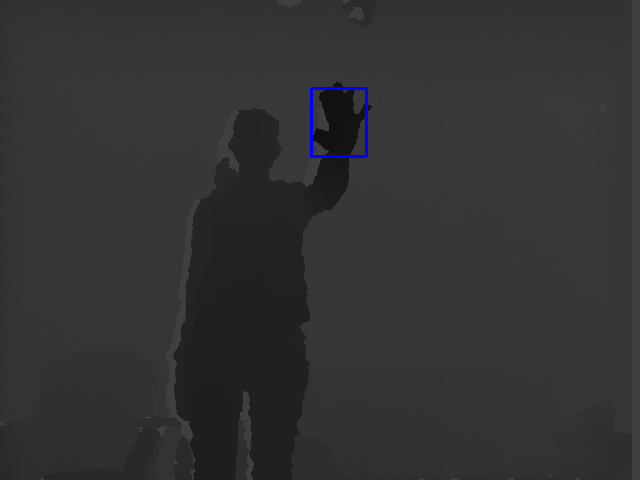

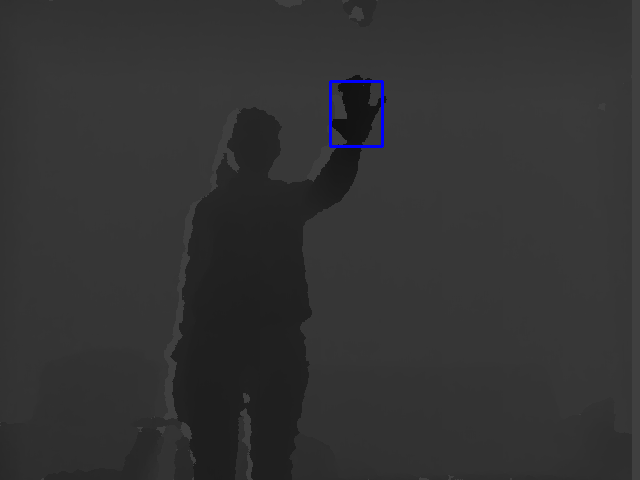

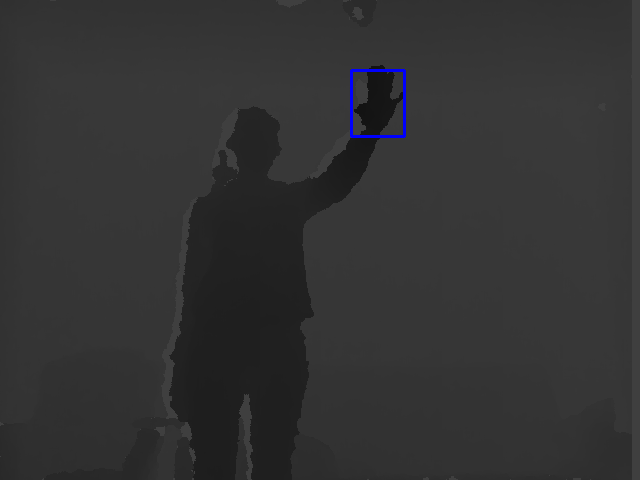

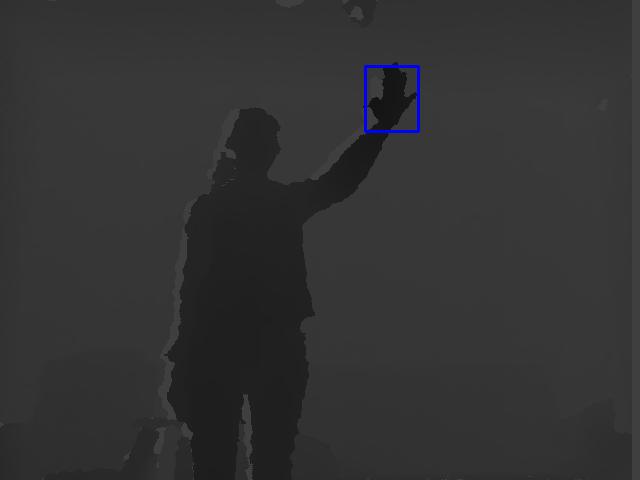

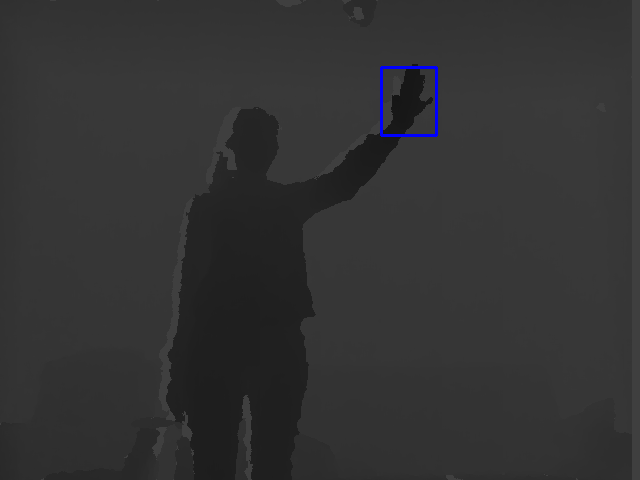

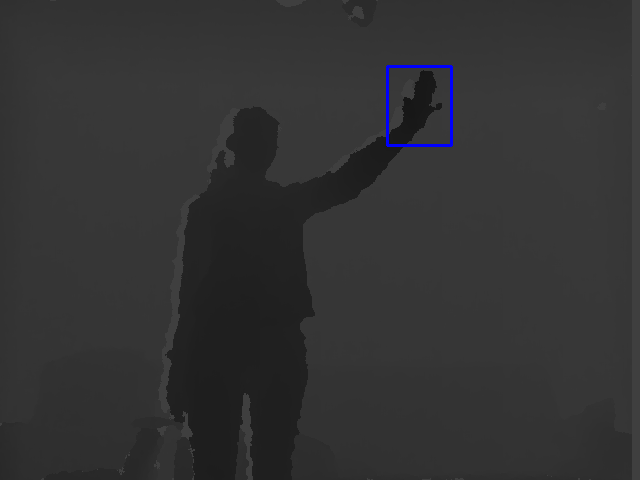

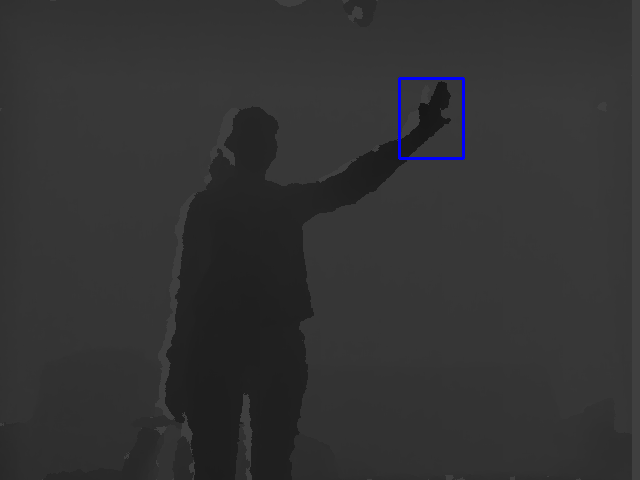

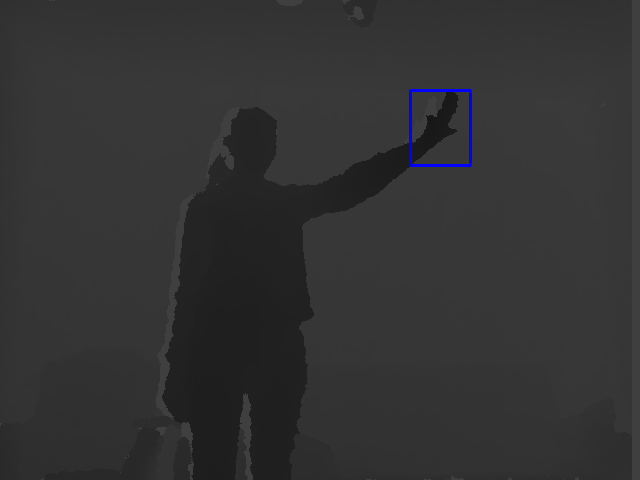

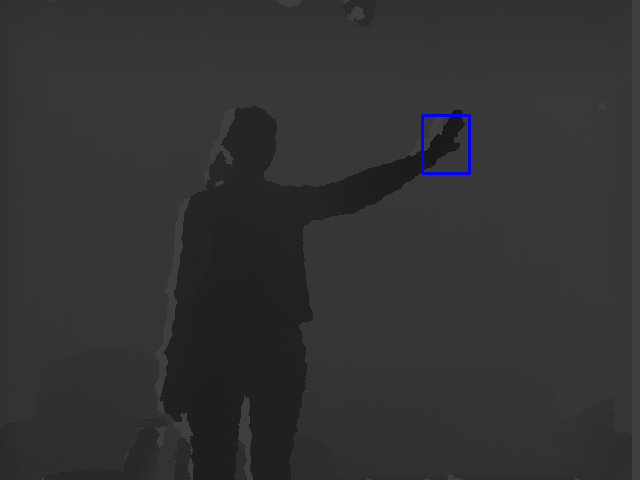

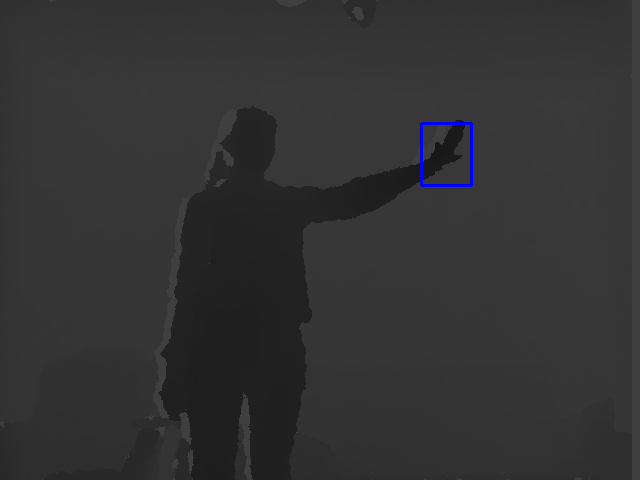

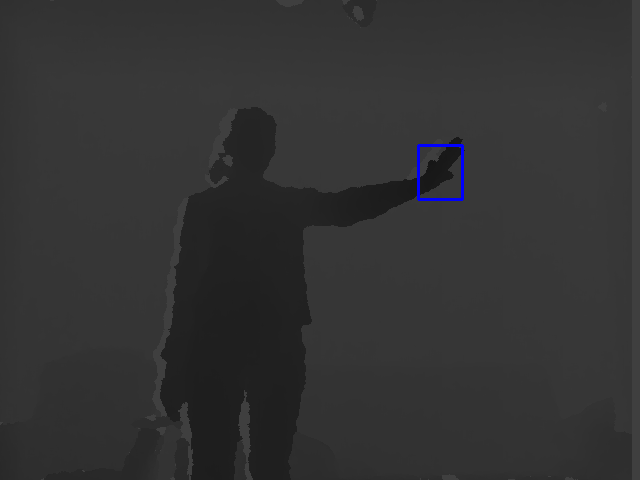

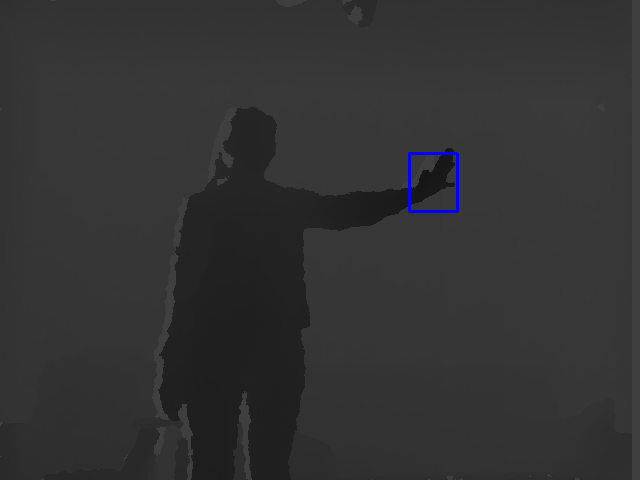

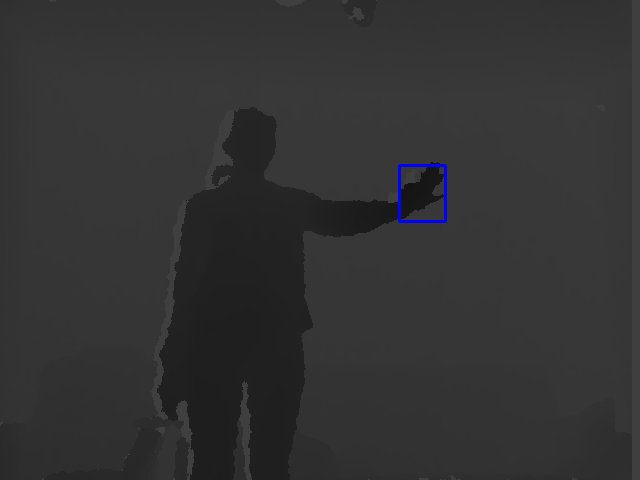

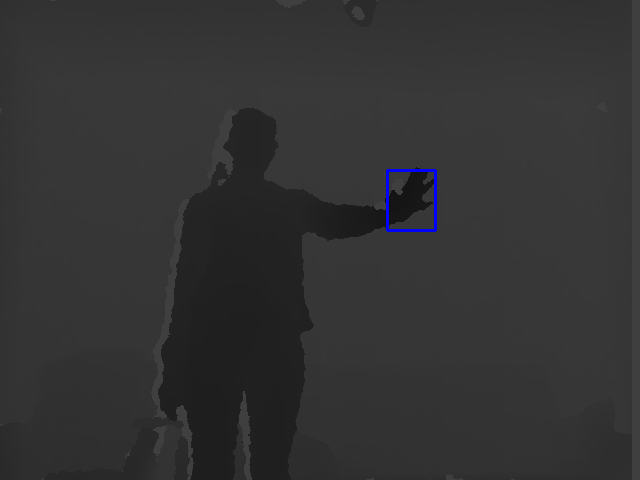

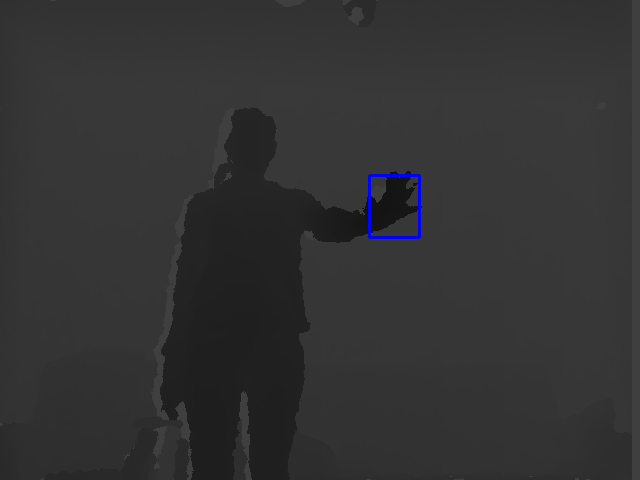

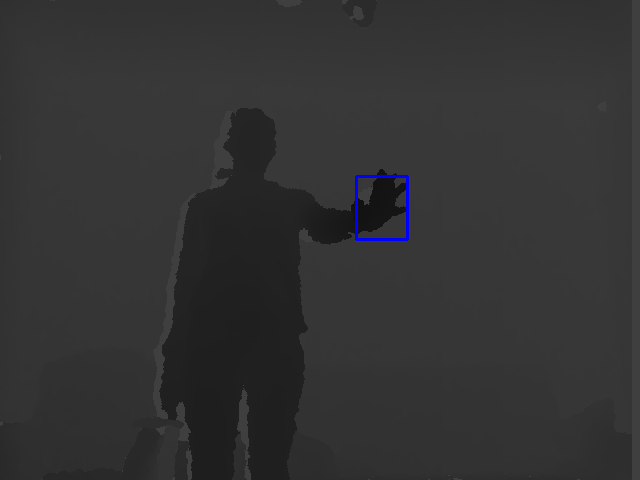

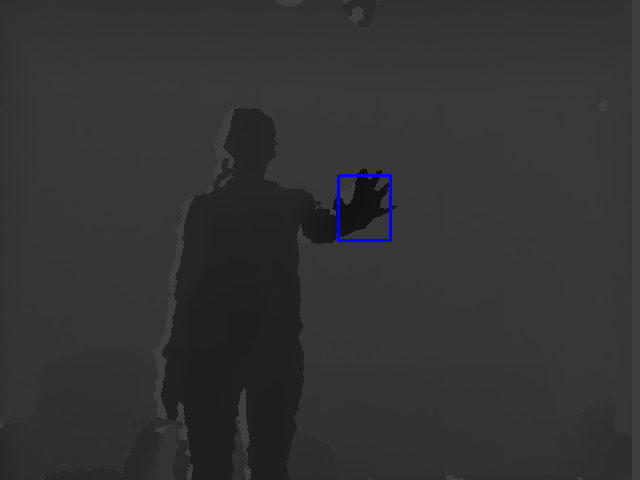

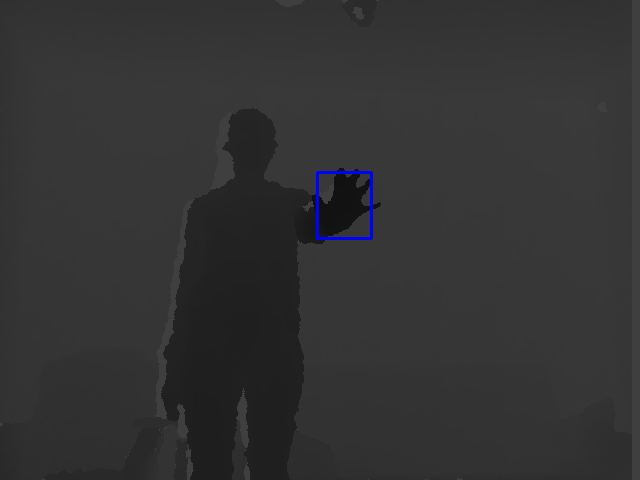

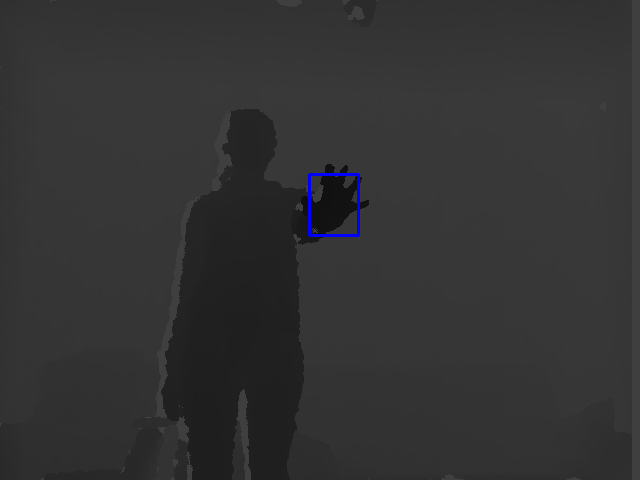

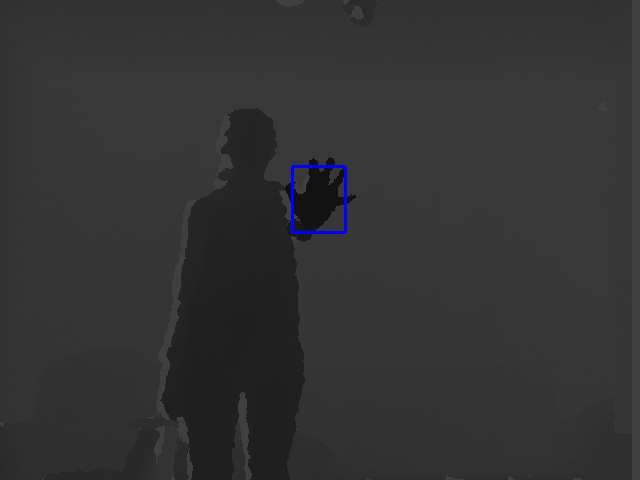

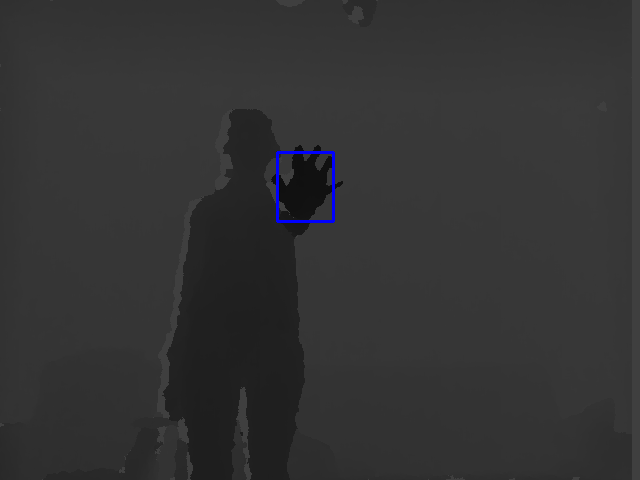

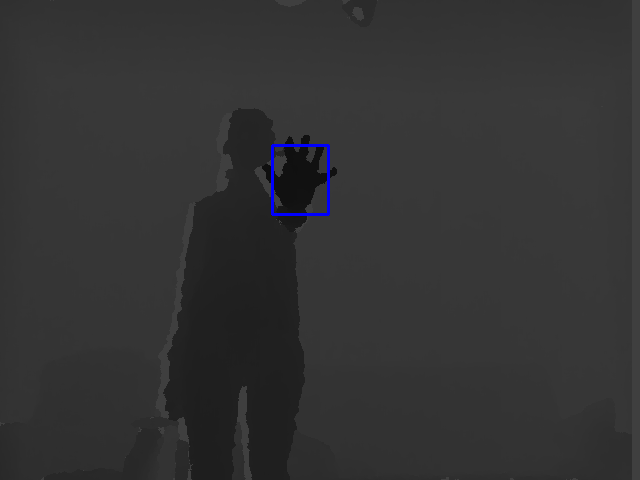

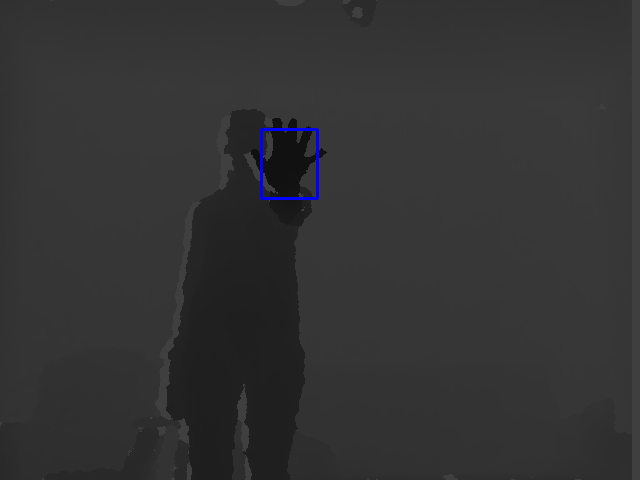

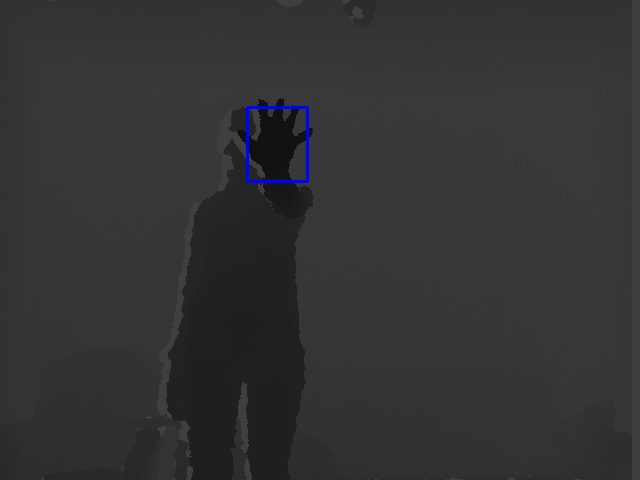

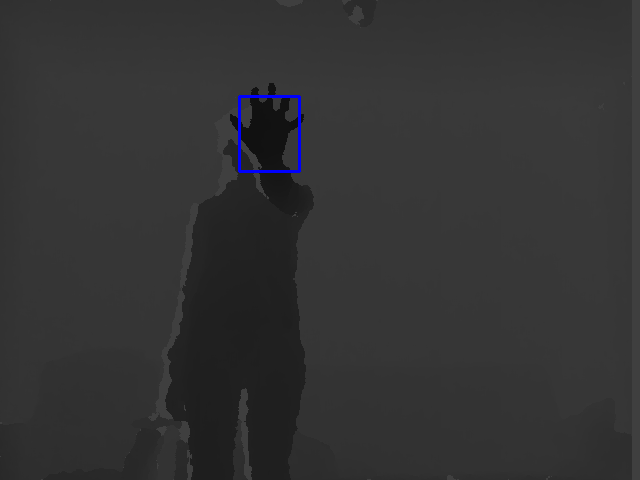

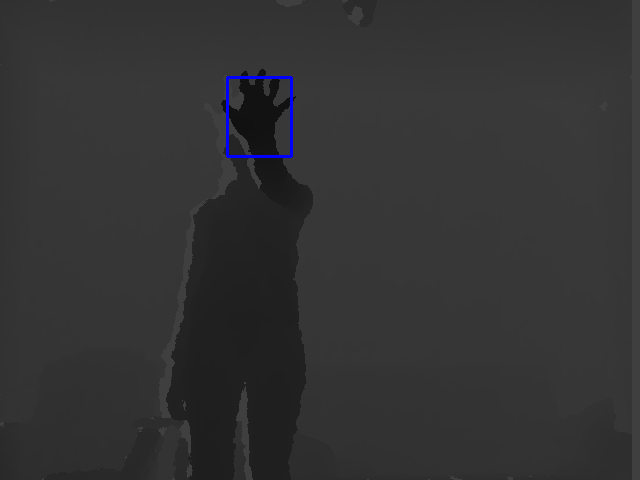

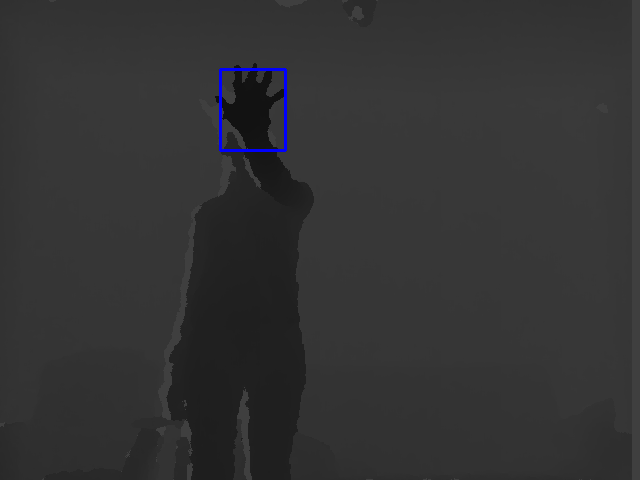

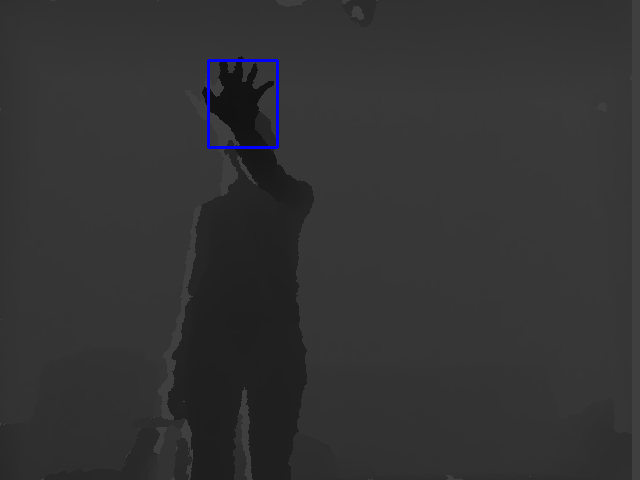

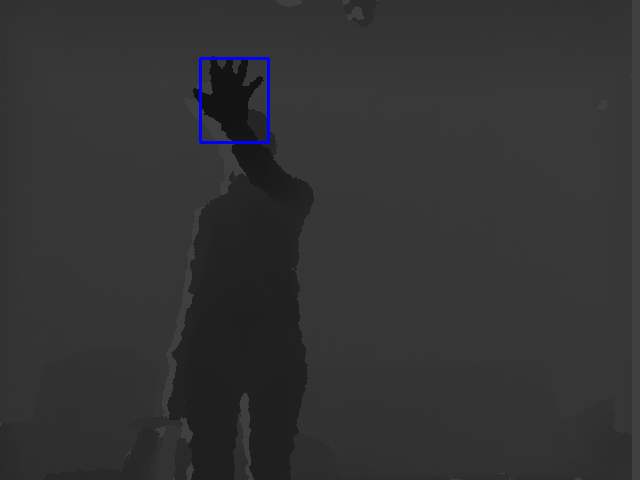

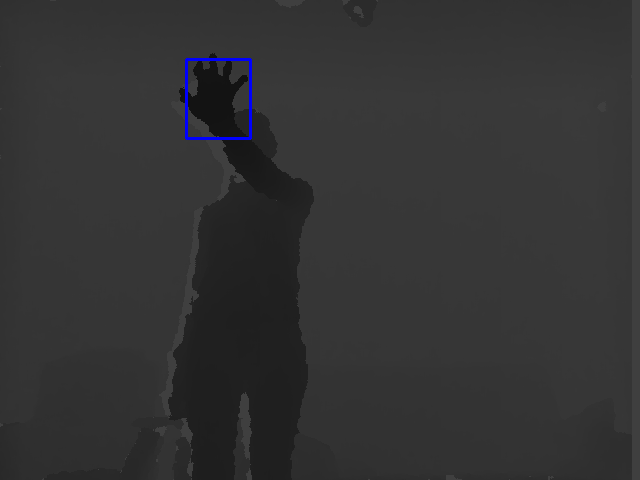

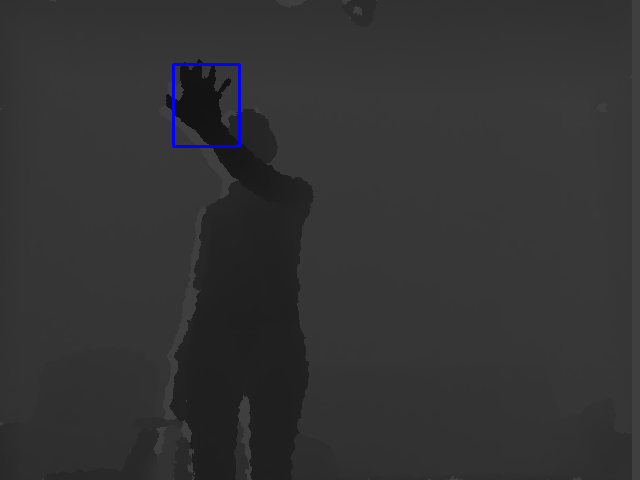

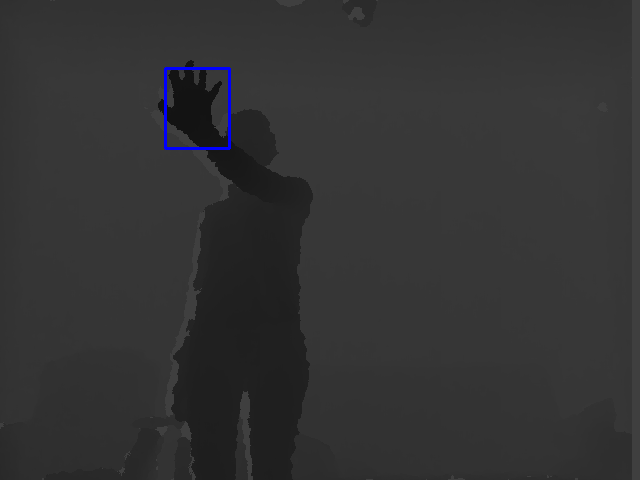

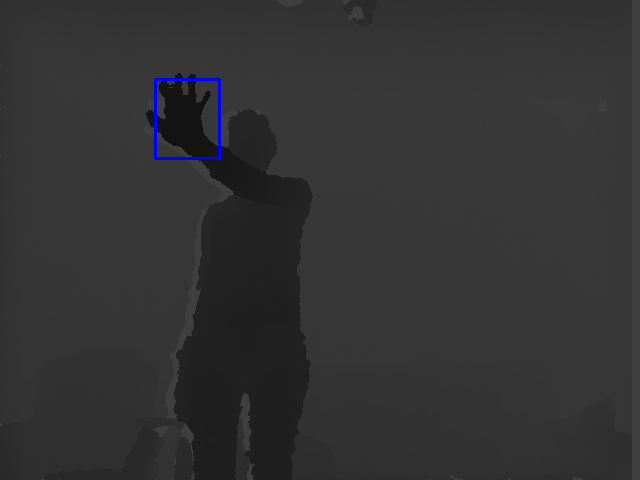

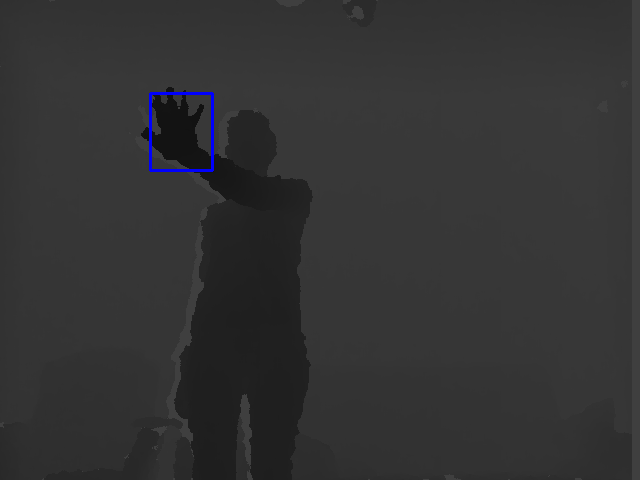

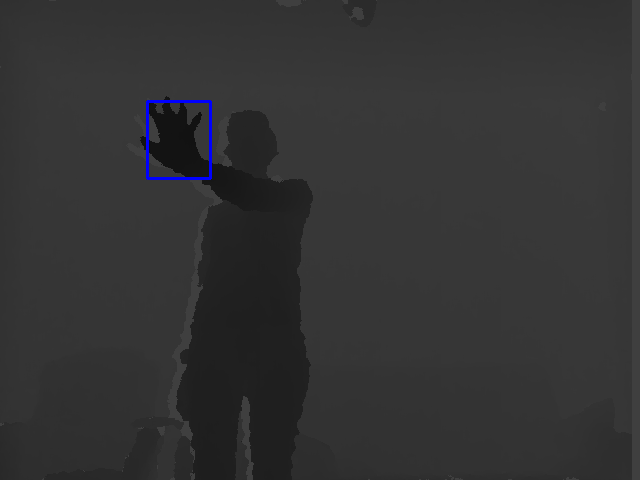

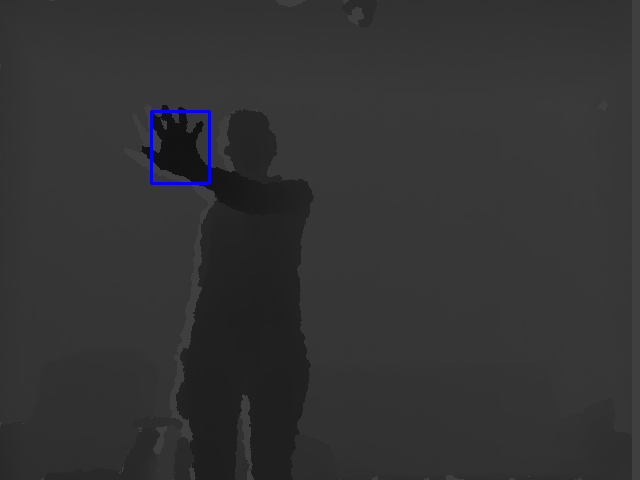

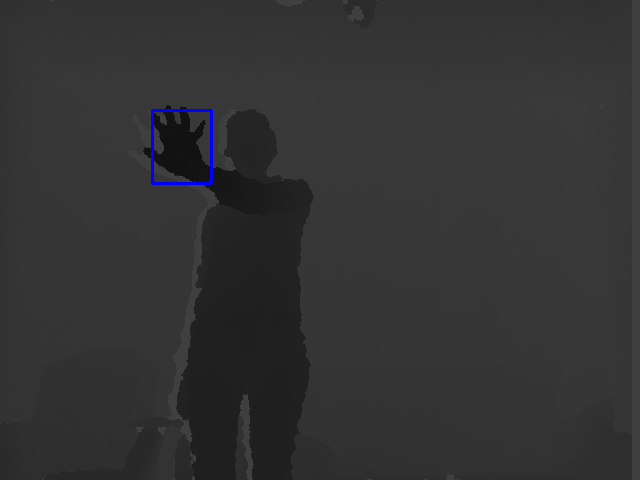

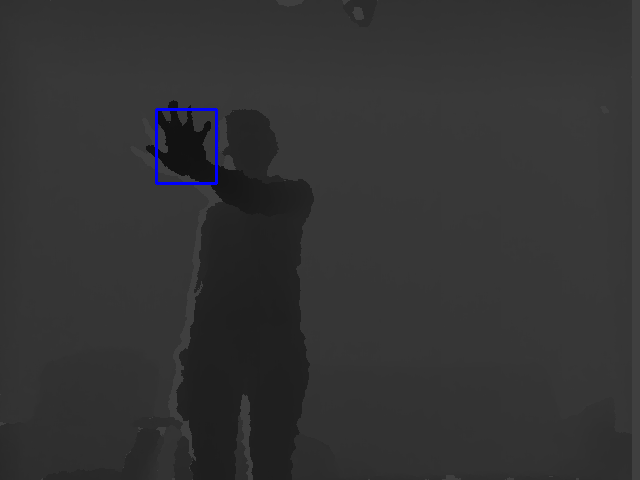

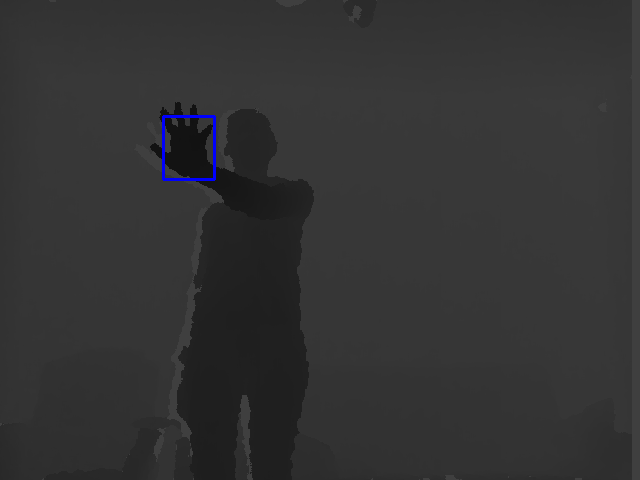

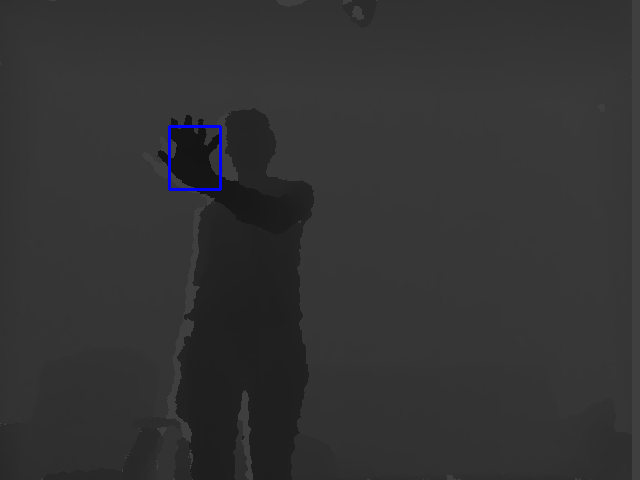

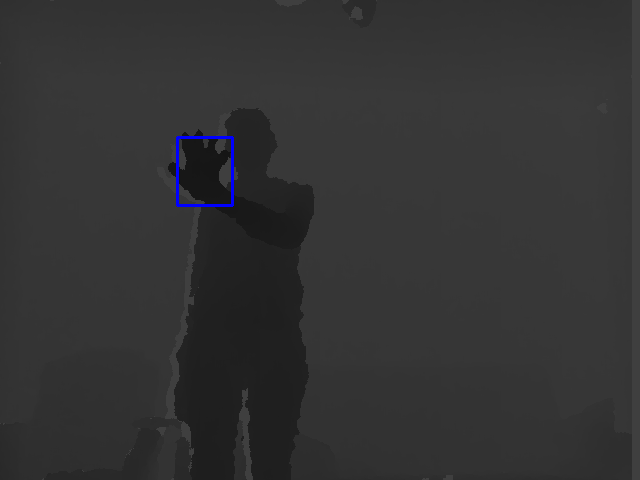

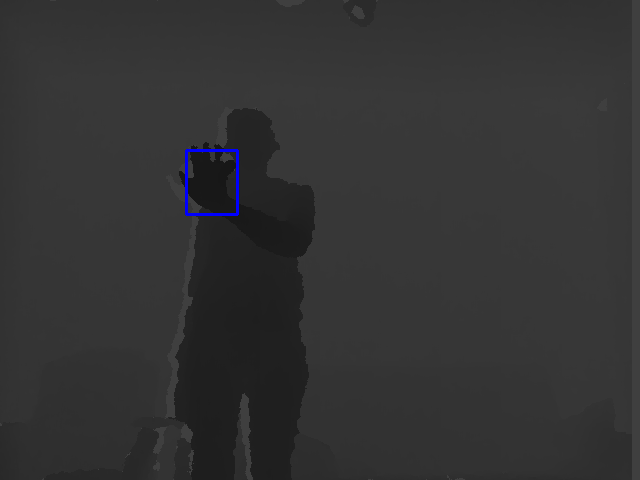

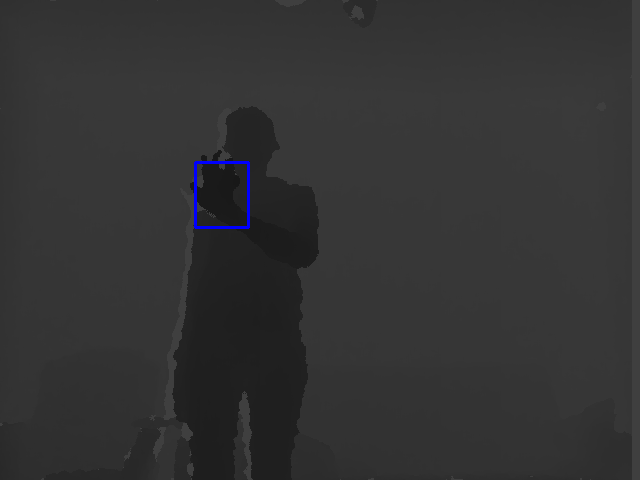

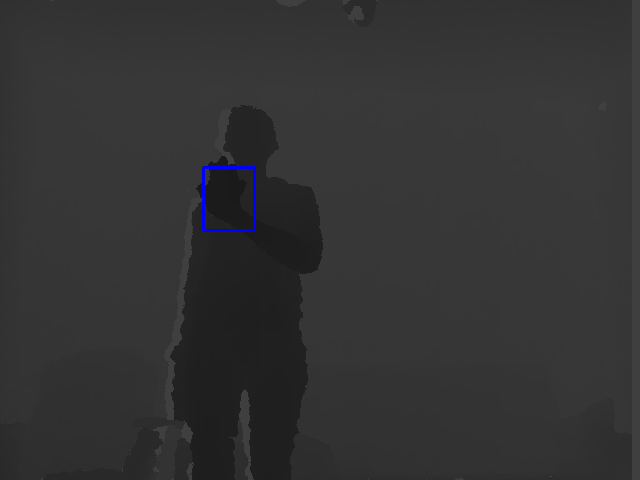

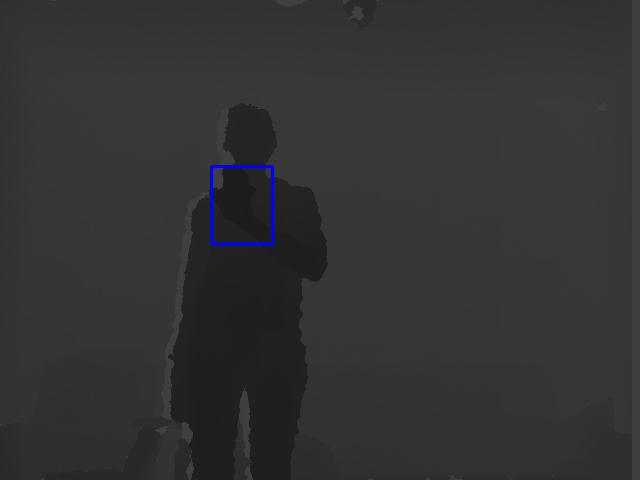

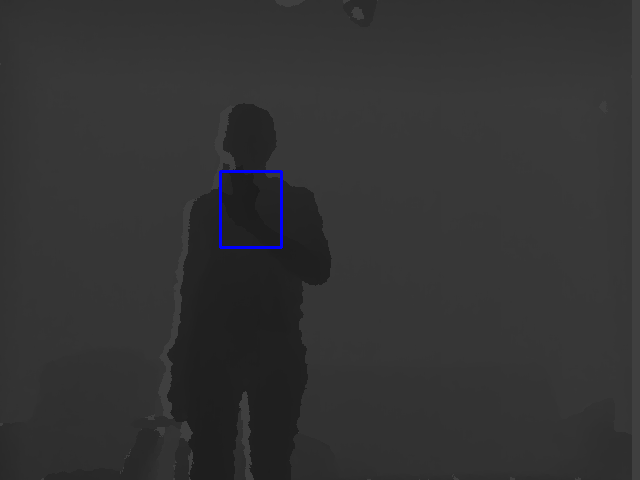

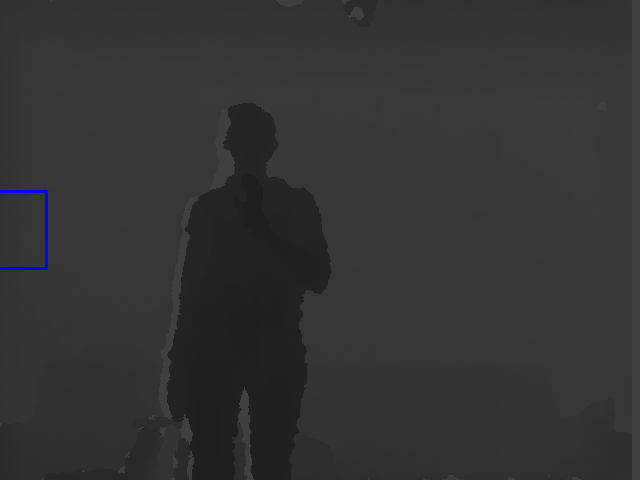

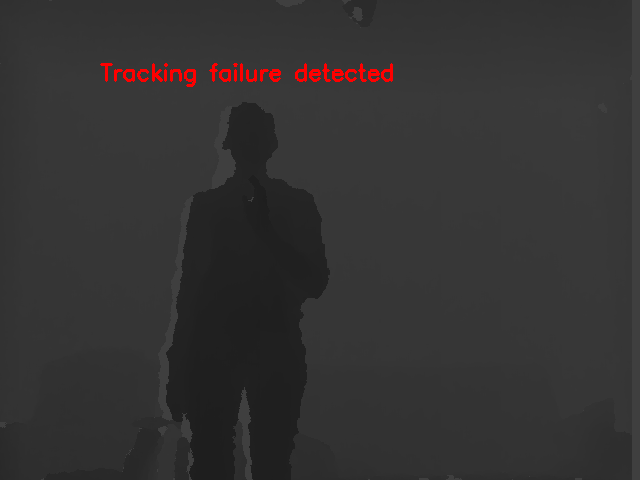

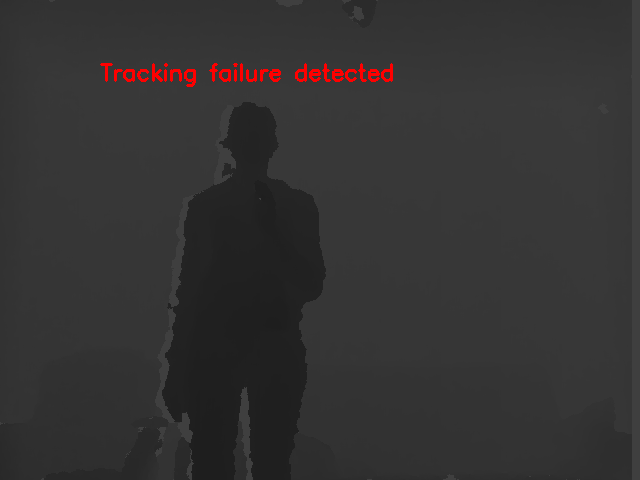

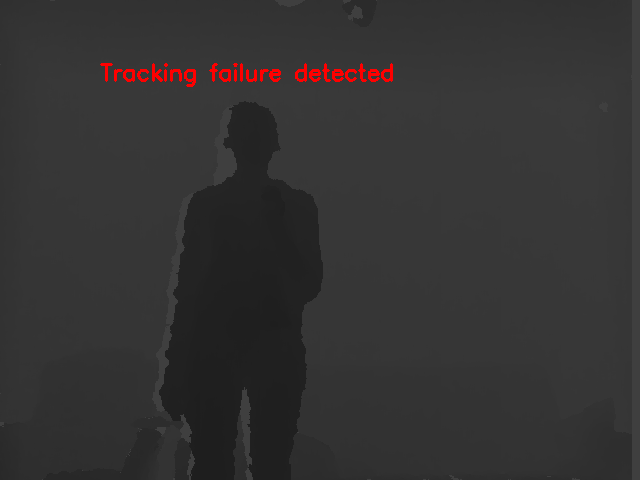

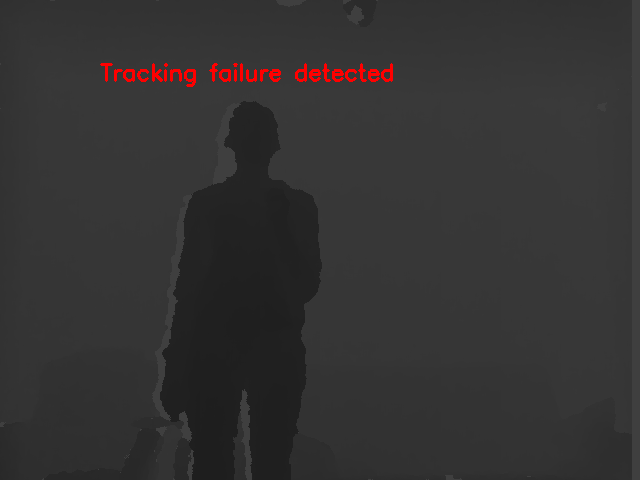

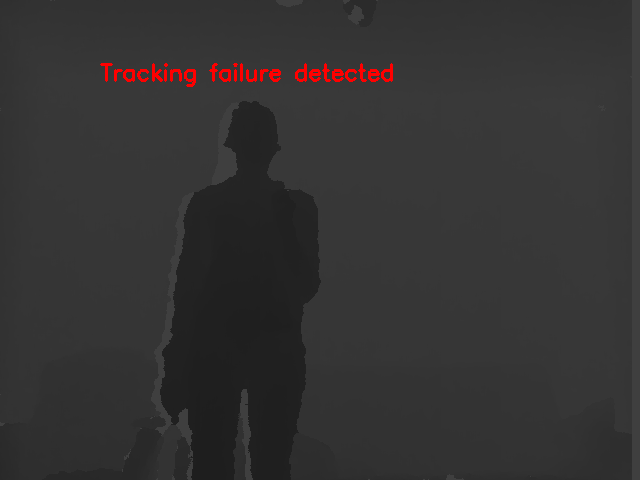

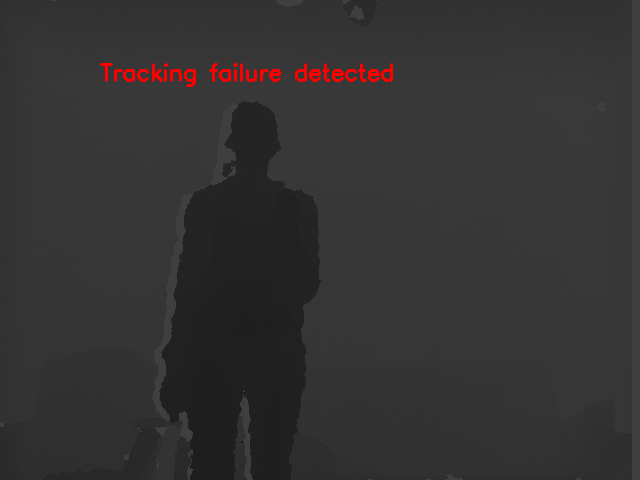

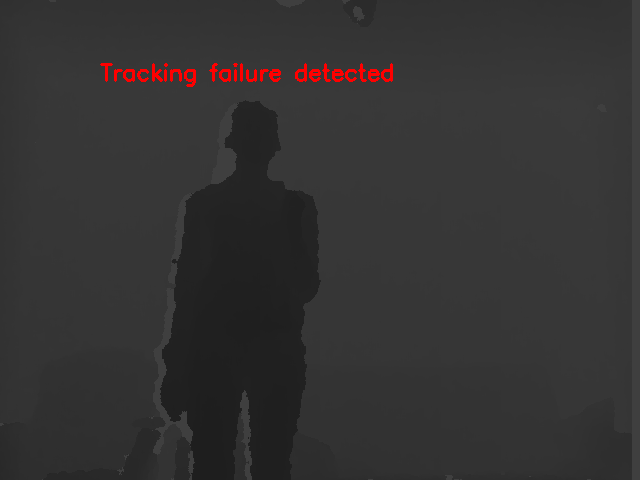

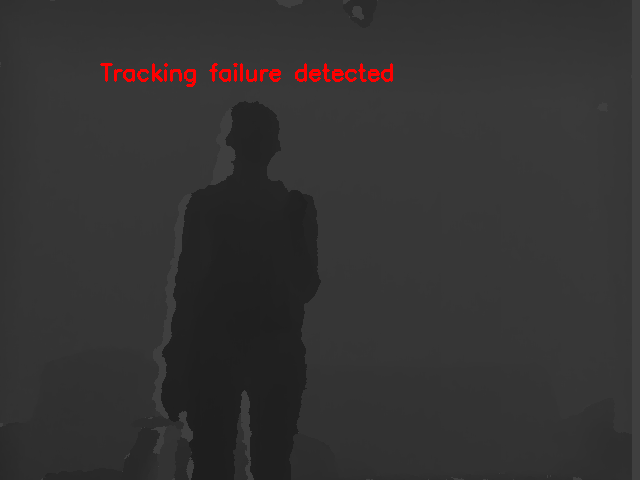

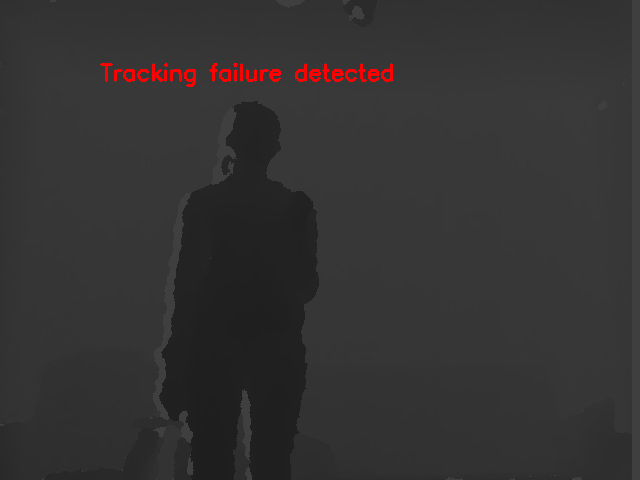

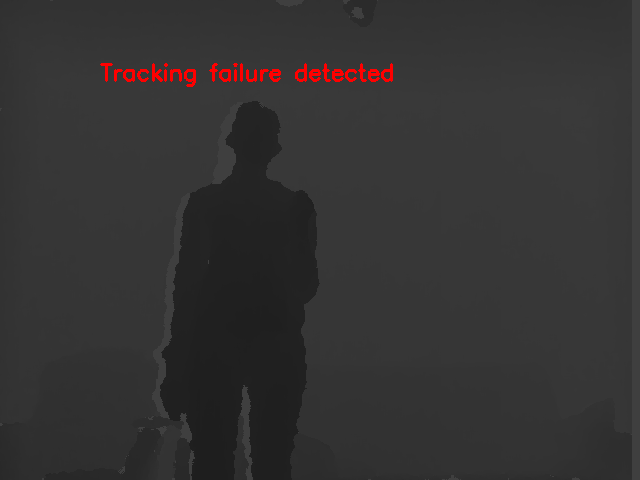

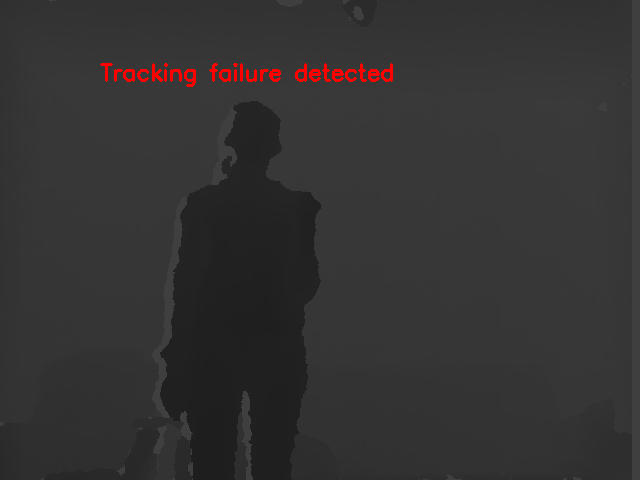

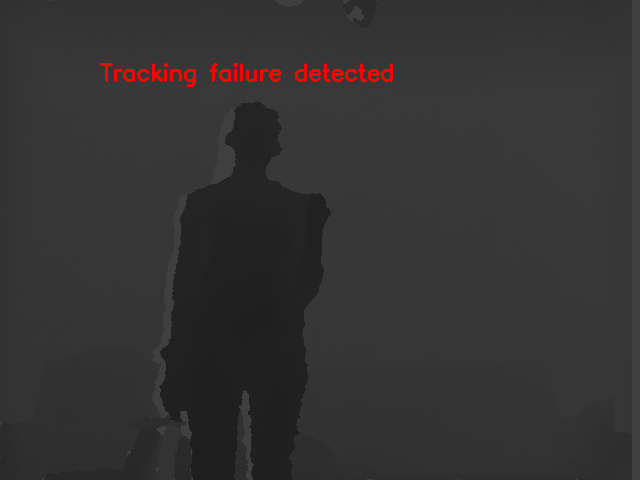

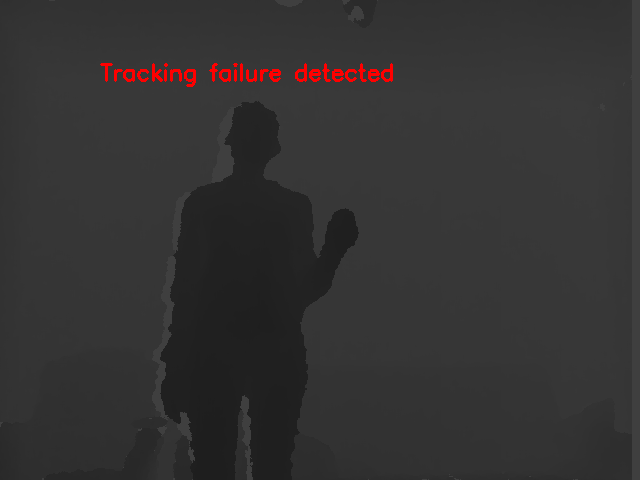

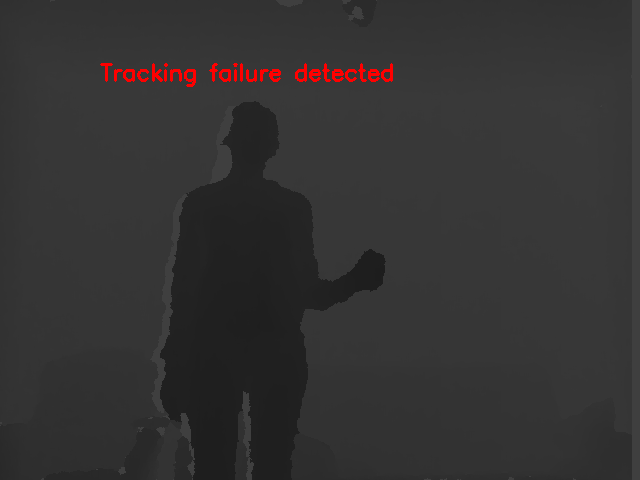

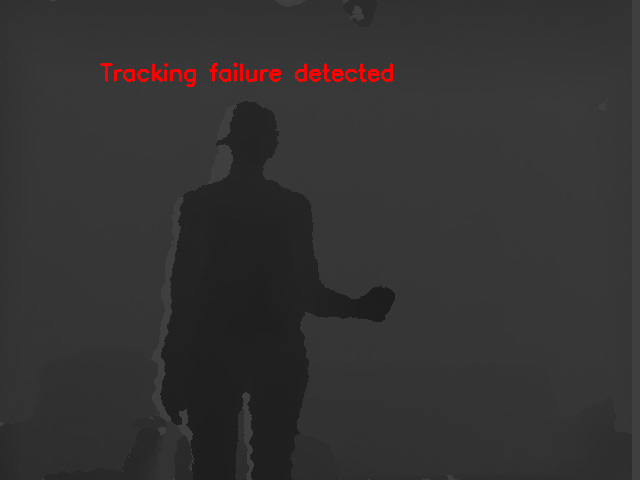

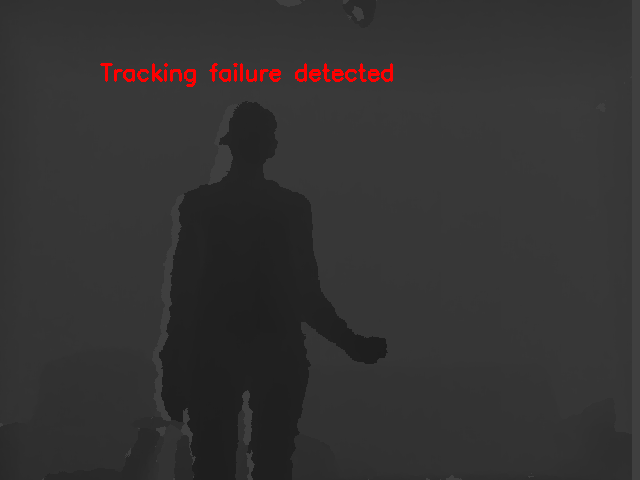

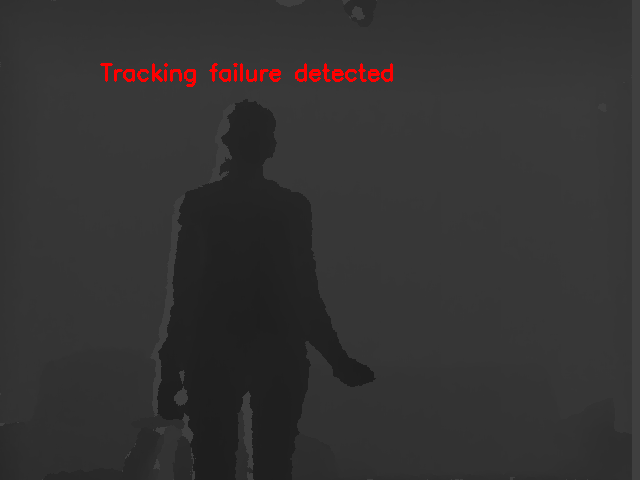

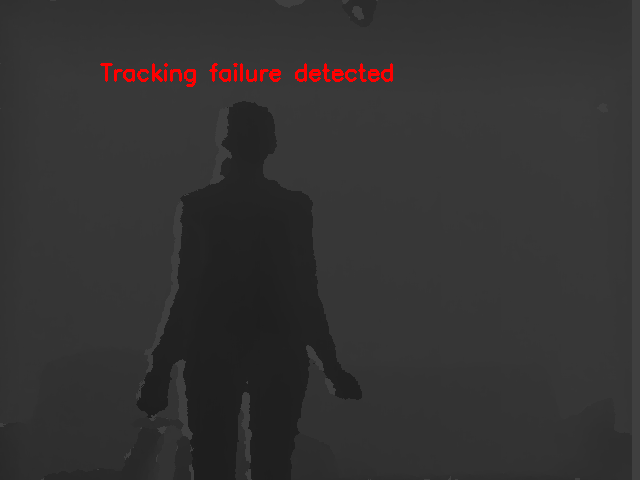

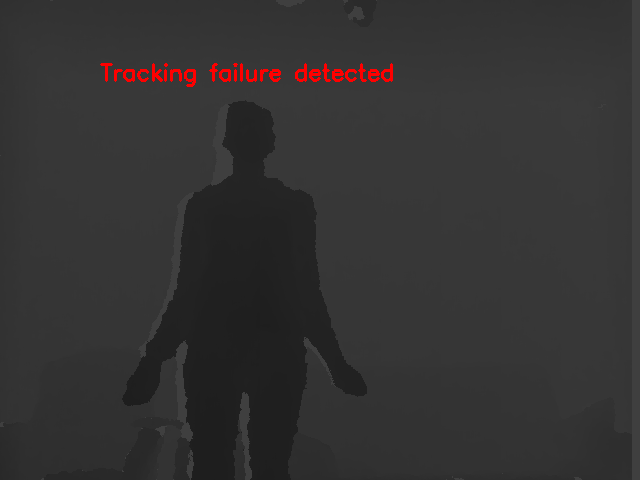

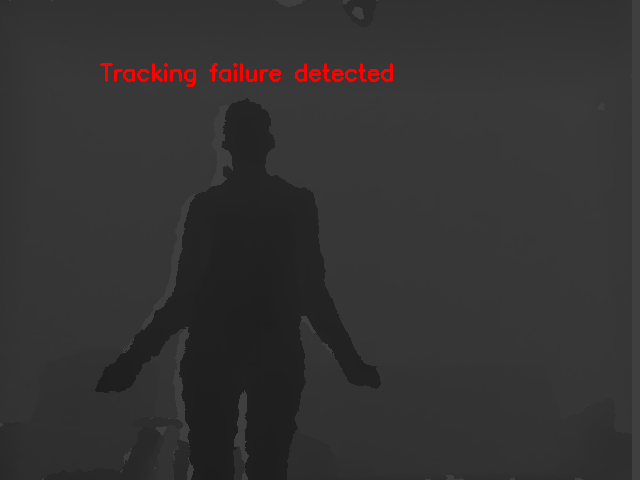

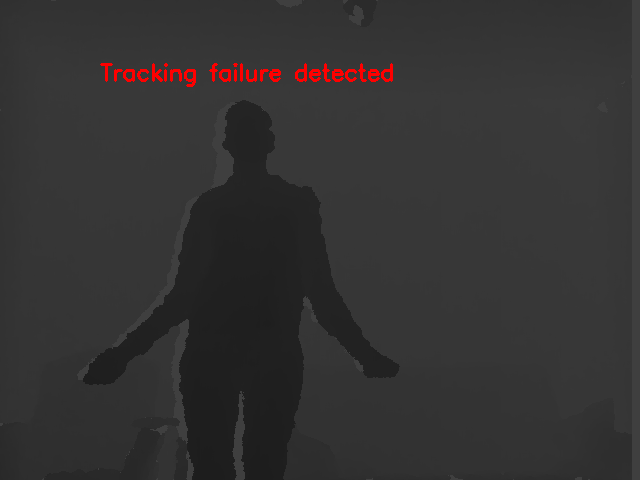

In [0]:
color = gray.copy()
boundRect = cv2.boundingRect(max_contour)
cv2.rectangle(color, (int(boundRect[0]), int(boundRect[1])),(int(boundRect[0]+boundRect[2]), int(boundRect[1]+boundRect[3])), (255,255,0),2)

tracker = cv2.TrackerMedianFlow_create()
trackerInit = tracker.init(gray_copy, boundRect)

for a in range(1000):
  trackerInit, frame = cap.read()
  if not trackerInit:
    break
  
  np.clip(frame, 0, 2**10-1, frame)
  frame >>= 2
  frame = frame.astype(np.uint8)   
  
  gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
  gray_copy = gray.copy()
  
  gray_copy = np.where(((gray_copy <= 30) & (gray_copy >= 10)), 128, 0)
  gray_copy = gray_copy.astype('uint8')
  
  trackerInit, boundRect = tracker.update(gray_copy)
  if trackerInit:
  # Tracking success
    p1 = (int(boundRect[0]), int(boundRect[1]))
    p2 = (int(boundRect[0] + boundRect[2]), int(boundRect[1] + boundRect[3]))
    cv2.rectangle(frame, p1, p2, (255,0,0), 2, 1)
  else :
    # Tracking failure
    cv2.putText(frame, "Tracking failure detected", (100,80), cv2.FONT_HERSHEY_SIMPLEX, 0.75,(0,0,255),2)
  cv2_imshow(frame)

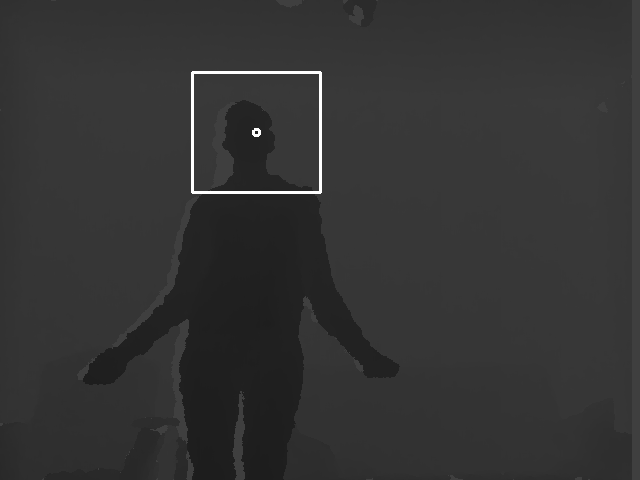

In [0]:
#color = cv2.cvtColor(gray, cv2.COLOR_GRAY2RGB)
color = gray.copy()



cv2.circle(color, (int((x1+x2) /2), int((y1+y2)/2)), 3, [255, 102, 0], 2)
cv2.rectangle(color, (x1, y1), (x2, y2), [255, 102, 0], 2)

cv2_imshow(color)
cap.release()

In [0]:
!ls

drive  sample_data
